In [1]:
!pip install geopandas

In [2]:
!pip install imageio

In [3]:
!pip install laspy

In [4]:
#!pip install rasterio

In [5]:
!pip install folium

In [6]:
import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt
import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio import mask
import folium
import geopandas as gpd
import io
from shapely.geometry import box
import pdal

In [7]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

In [8]:
import os
os.chdir("../data")
os.listdir()

['iowa.json', 'laz', 'tif']

In [9]:

# Read raster/tif file
# --------------------
iowa_tif = '../data/tif/iowa.tif'
raster_iowa = rasterio.open(iowa_tif)
iowa_data = raster_iowa.read(1)

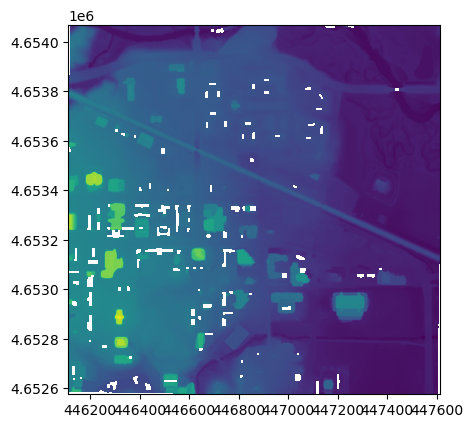

<AxesSubplot:>

In [10]:
from rasterio.plot import show
#plt won't work because tiff is an object not an array
raster_iowa = rasterio.open(iowa_tif)
show(raster_iowa)

In [11]:
full_image = raster_iowa.read()
full_image.shape

(1, 1493, 1499)

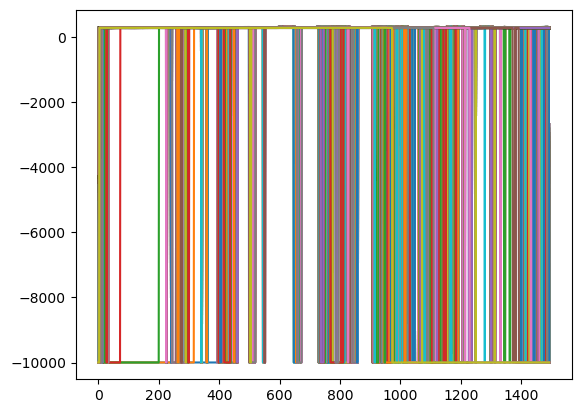

In [12]:

img_band =  raster_iowa.read(1)
plt.plot(img_band)
plt.show()

In [13]:
#find out CRS
print("Co-ordinate Reference System:", raster_iowa.crs)

Co-ordinate Reference System: EPSG:26915


In [67]:
#raster_iowa.to_crs(epsg=4326).plot()

In [14]:
type(iowa_data)

numpy.ndarray

In [15]:
count = iowa_data[iowa_data > 0].sum()
count

623568522.8765813

In [16]:
metadata = raster_iowa.meta
print("Metadata: {metadata}\n".format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': -9999.0, 'width': 1499, 'height': 1493, 'count': 1, 'crs': CRS.from_epsg(26915), 'transform': Affine(1.0, 0.0, 446112.3908587211,
       0.0, -1.0, 4654068.192733061)}



In [17]:
desc = raster_iowa.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: ('idw',)



In [18]:
#geo-transform
print("Geotransform:",raster_iowa.transform)

Geotransform: | 1.00, 0.00, 446112.39|
| 0.00,-1.00, 4654068.19|
| 0.00, 0.00, 1.00|


In [19]:

# get shp from tif
from glob import glob
def get_shp_from_tif(tif_path:str, shp_file_path:str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id":1,"geometry":[box(*bounds)]})
   
    # save to file
    df.to_file(shp_file_path)
    return df
    print('Saved..')

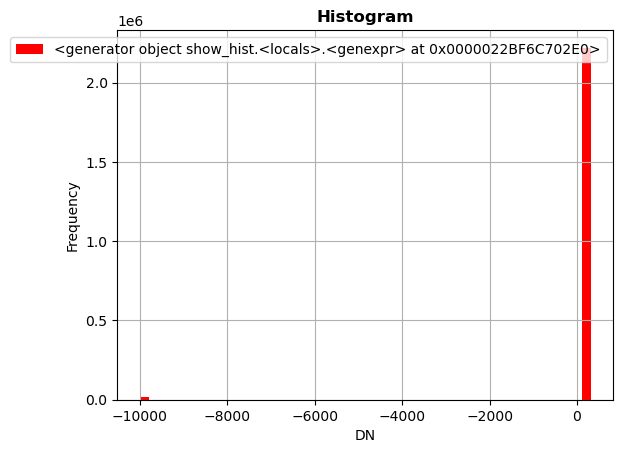

In [20]:
rasterio.plot.show_hist(full_image,bins=50,histtype='stepfilled',lw=0.0,stacked=False)

In [21]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(iowa_data, title)

In [22]:
import geopandas as gpd
from shapely.geometry import Polygon

MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

geometry
0  POLYGON ((-93.75616 41.91801, -93.75616 41.921...

In [23]:
shp_df = get_shp_from_tif("../data/tif/iowa.tif", "../data/shp")

In [24]:
shp_df

id                                           geometry
0   1  POLYGON ((447611.391 4652575.193, 447611.391 4...

In [73]:
shp_df = gpd.read_file('../data/shp/shp.shp')
shp_df.plot()

<AxesSubplot:>

In [75]:
#shp_df.to_crs(epsg=4326).plot()

In [25]:
!pip install georaster

In [26]:
import georaster
print(georaster.__file__)

C:\Users\DELL\anaconda3\envs\iowa\lib\site-packages\georaster\__init__.py


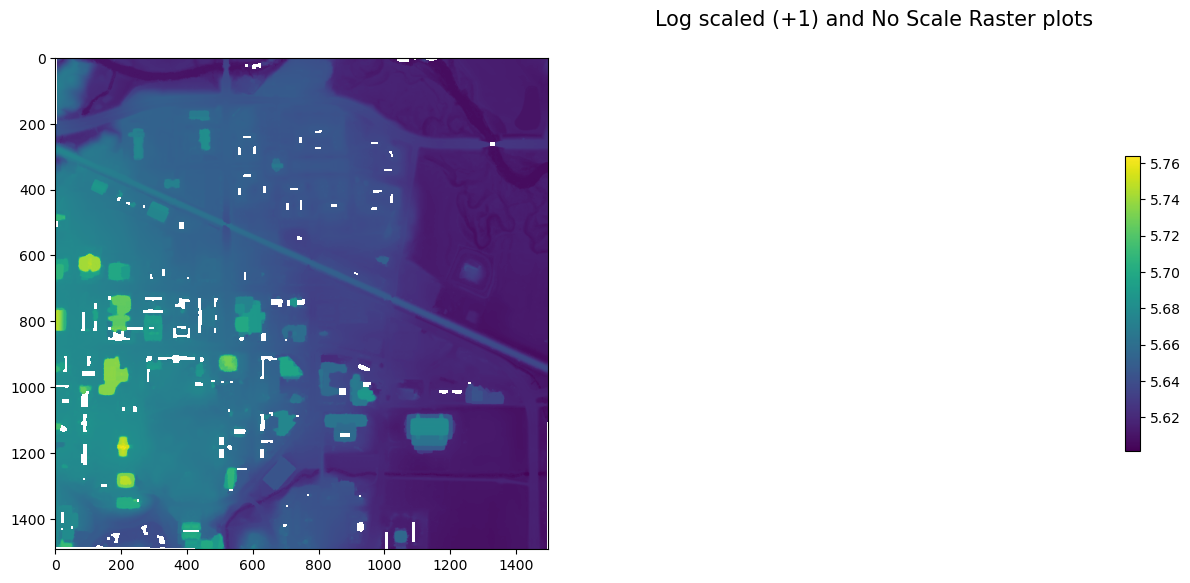

In [27]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('../data/tif/iowa.tif', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.show(block=False)

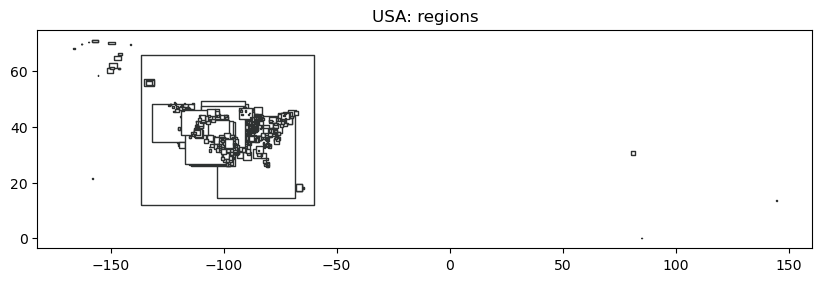

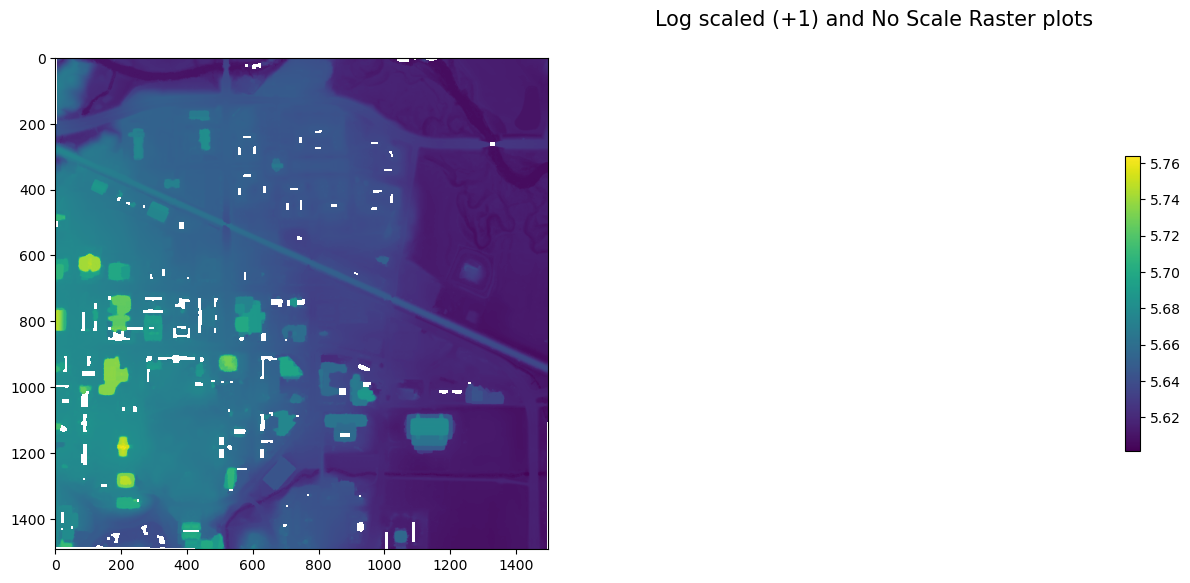

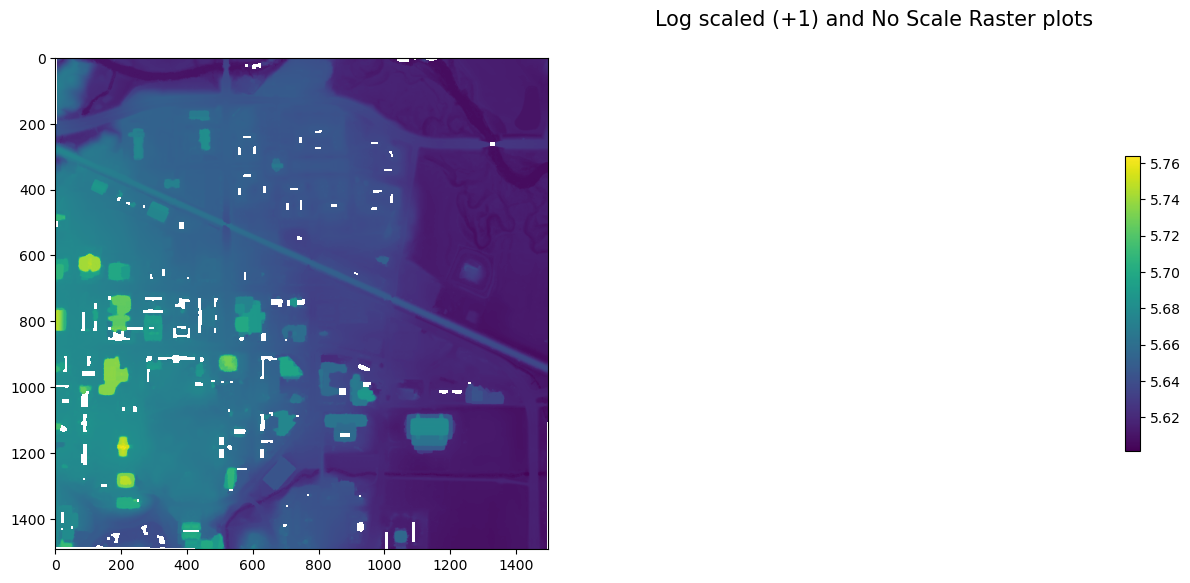

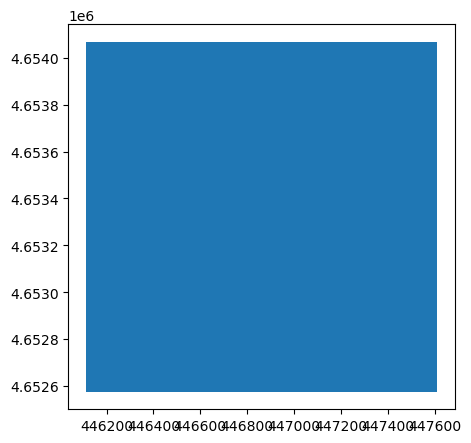

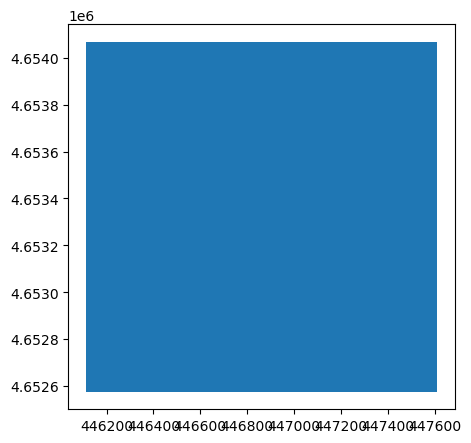

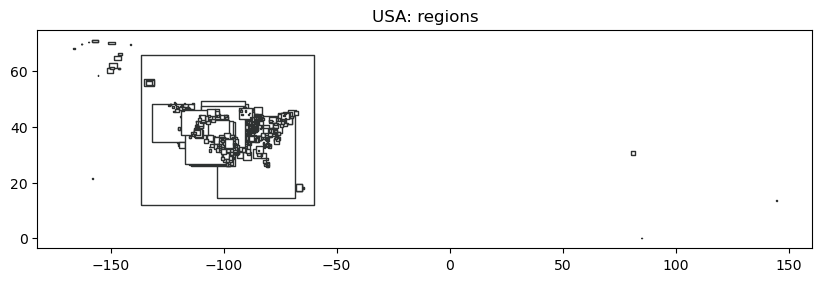

<Figure size 1200x800 with 0 Axes>

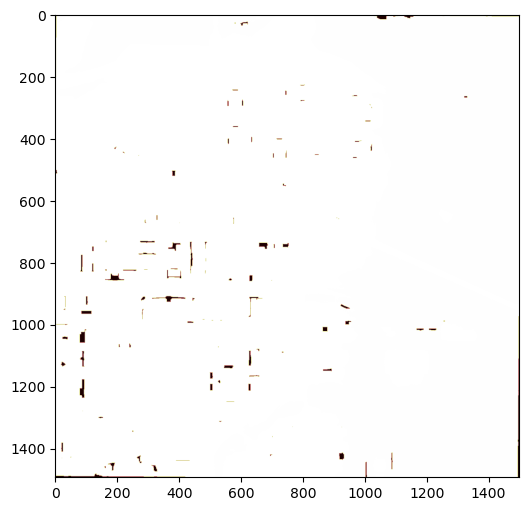

In [92]:
src = rasterio.open("../data/tif/iowa.tif")
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

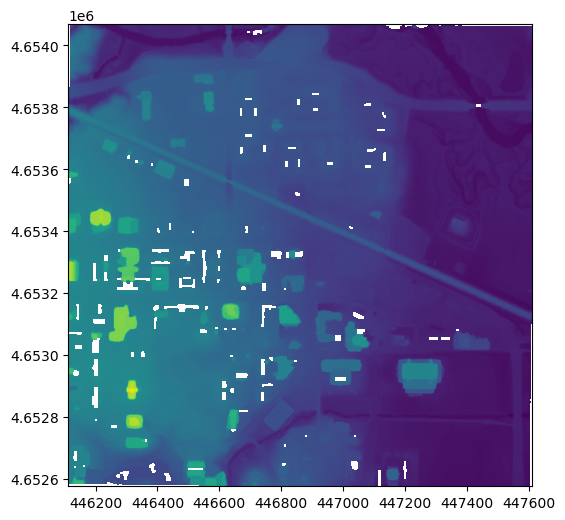

<AxesSubplot:>

In [93]:
from rasterio.plot import show
plt.figure(figsize=(10, 6))
show(src)

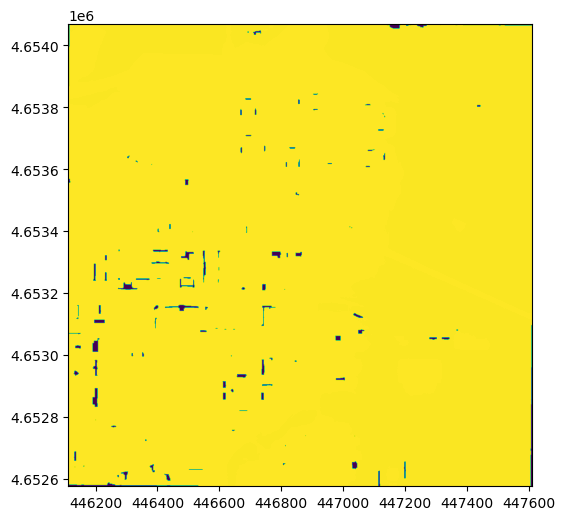

<AxesSubplot:>

In [94]:
plt.figure(figsize=(10, 6))
show((src, 1), transform=src.transform, cmap='viridis')

In [95]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((src, 1), ax=ax, contour=True, contour_label_kws={})

<AxesSubplot:>

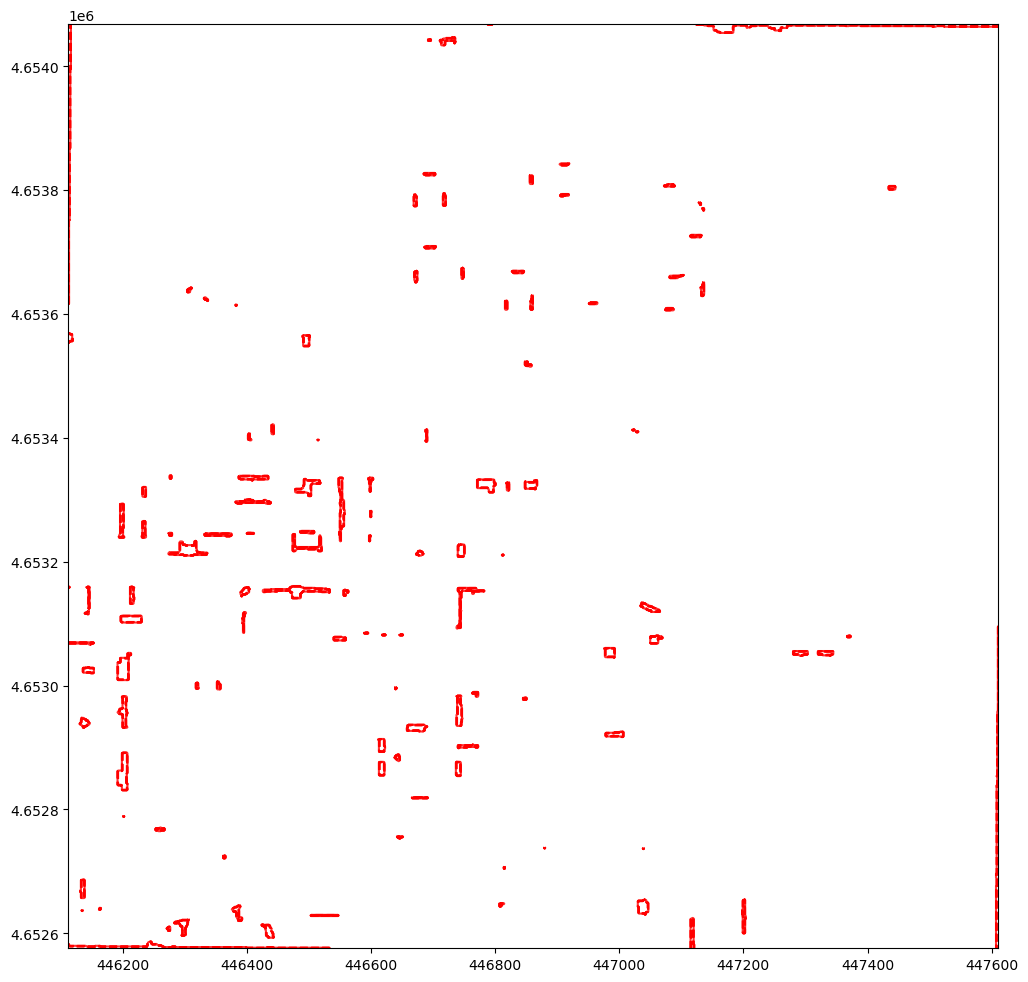

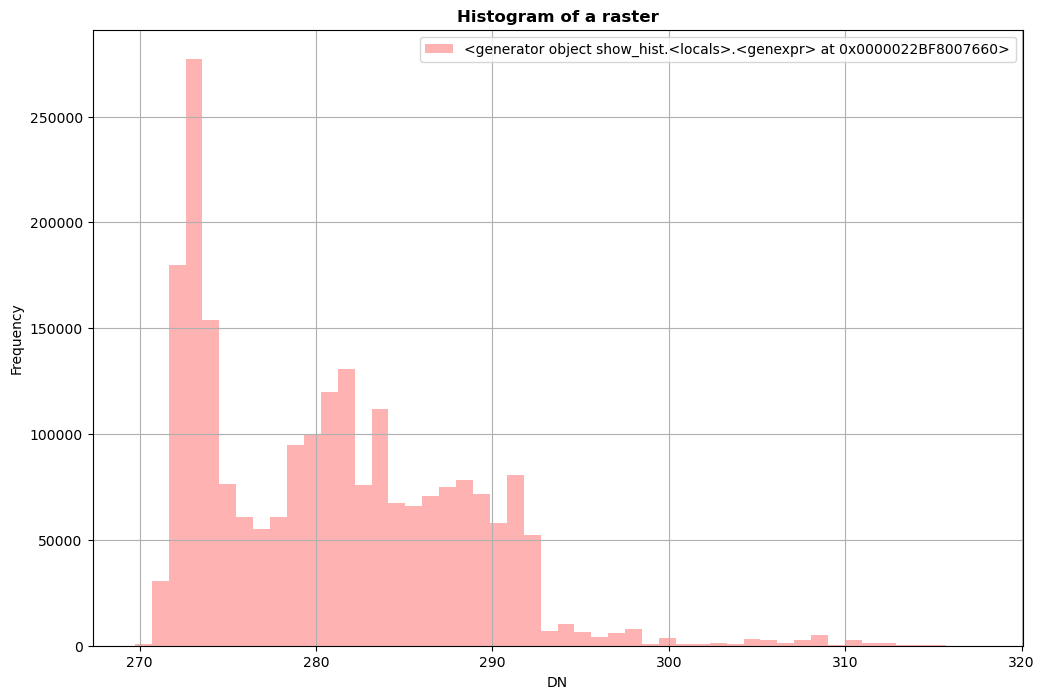

In [96]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")

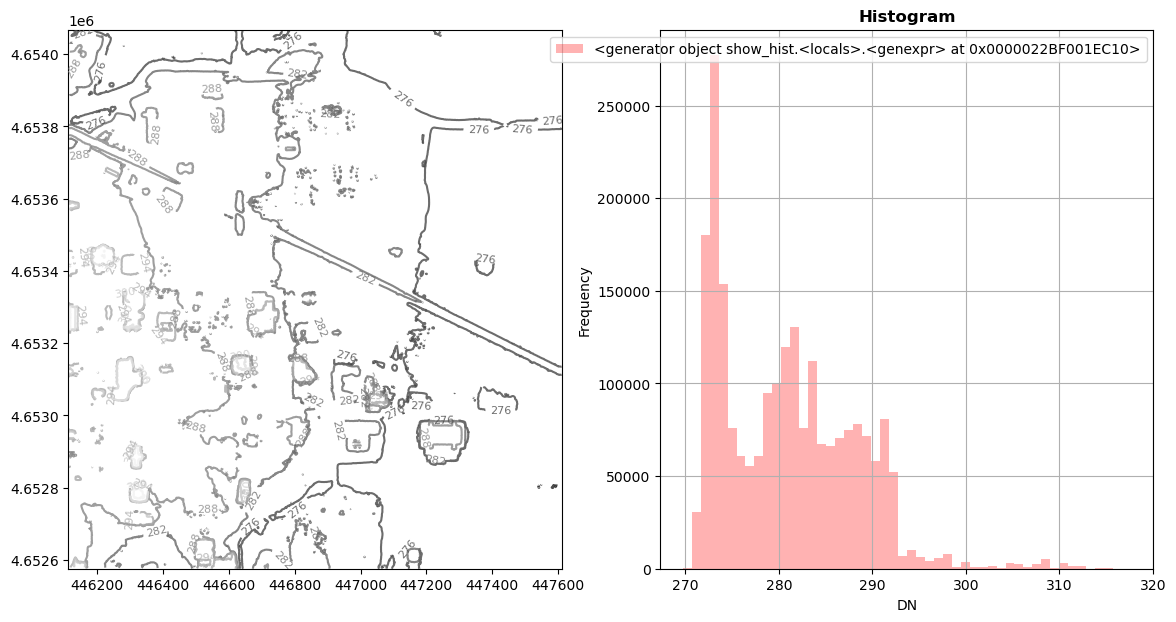

In [97]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show((src), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()


In [99]:
## Plot raster/tif image
# --------------------
import numpy as np
def plot_raster(rast_data, title='', figsize=(10,10)):
    """
    Plots population count in log scale(+1)
    """
    plt.figure(figsize = figsize)
    im1 = plt.imshow(np.log1p(rast_data),) # vmin=0, vmax=2.1)

    plt.title("{}".format(title), fontdict = {'fontsize': 20})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

In [32]:

def select_name(name:str):
    name_ls = []
    names_list =  io.open('../data/filename.txt', encoding='UTF-8').read().strip().split('\n')
    if name in names_list:
        return name
    if name == 'all':
        return names_list
    else:
        for words in names_list:
            words_ls = words.split('_')
            if name in words_ls:
                name_ls.append(words)
            else: continue
        if name_ls == []:
            print(f"Name - ({name}) not found, input a valid name")
            return None
        else: return name_ls

In [33]:
y = select_name('all')

In [34]:
import json
import urllib.request as urllib
import pickle

In [35]:
pre = 'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/'
trail ='/ept.json'

In [36]:
gdf_dict ={'name':[], 'year':[], 'path':[], 'geometry':[], 'bounds':[]}
counter = 0
with open('../data/filename.txt') as f:
    for line in f:
        line_ = line.strip('/\n')
        gdf_dict['name'].append(line_)
        year = line_.split('_')[-1]
        gdf_dict['year'].append(year)
        path = pre + line_ + trail
        gdf_dict['path'].append(path)
        try:
            j_res = json.load(urllib.urlopen(path))
            wkt = j_res['srs']['wkt']
            bounds = j_res['bounds']
        except:
            print('path: {}\ncounter: {}'.format(path, counter))
            wkt = None
            bounds = None
        counter += 1
        gdf_dict['geometry'].append(wkt)
        gdf_dict['bounds'].append(bounds)
        if counter%100 == 0:
            print('\nCounter: {}'.format(counter))


Counter: 100

Counter: 200

Counter: 300

Counter: 400

Counter: 500

Counter: 600

Counter: 700

Counter: 800

Counter: 900

Counter: 1000

Counter: 1100

Counter: 1200

Counter: 1300

Counter: 1400
path: https://s3-us-west-2.amazonaws.com/usgs-lidar-public/USGS_LPC_WA_Western_North_2016_LAS_2018/ept.json
counter: 1477
path: https://s3-us-west-2.amazonaws.com/usgs-lidar-public/USGS_LPC_WA_Western_South_2016_LAS_2018/ept.json
counter: 1478

Counter: 1500


In [37]:
out = open('gdf_dict.pkl','wb')

In [38]:
import pickle
pickle.dump(gdf_dict, out)
out.close()

In [39]:
gdf_dict

{'name': ['AK_BrooksCamp_2012',
  'AK_Coastal_2009',
  'AK_Fairbanks-NSBorough_2010',
  'AK_Juneau_2012',
  'AK_Kenai_2008',
  'AK_MatanuskaSusitna-Lot1_2011',
  'AK_MatanuskaSusitna-Lot2_2011',
  'AK_NomeCreek_2010',
  'AK_NorthSlope_B10_2018',
  'AK_NorthSlope_B11_2018',
  'AK_NorthSlope_B12_2018',
  'AK_NorthSlope_B13_2018',
  'AK_NorthSlope_B14_2018',
  'AK_NorthSlope_B1_2018',
  'AK_NorthSlope_B2_2018',
  'AK_NorthSlope_B3_2018',
  'AK_NorthSlope_B4_2018',
  'AK_NorthSlope_B5_2018',
  'AK_NorthSlope_B6_2018',
  'AK_NorthSlope_B7_2018',
  'AK_NorthSlope_B8_2018',
  'AK_NorthSlope_B9_2018',
  'AK_ValdezB_2007',
  'AK_Valdez_2007',
  'AK_YukonFlats_2009',
  'AL_25Co_TL_2017',
  'AL_BaldwinCo-East_2011',
  'AL_BaldwinCo-West_2011',
  'AL_BlountCo_2010',
  'AL_ColbertLauderdale_2011',
  'AL_NorthAL_2019',
  'AL_TriCounty_2010',
  'AR-TN_NRCS_CaneCreek_2010',
  'AR-TN_NRCS_Sharkey_2010',
  'ARRA-AK_EkluntaGlacier_2010',
  'ARRA-AL_MobileBay_2010',
  'ARRA-AL_TennesseeRiver_2010',
  'ARR

In [40]:
import geopandas as gpd
import pandas as pd

In [41]:
df = pd.DataFrame(gdf_dict)
df.head()

name  year  \
0           AK_BrooksCamp_2012  2012   
1              AK_Coastal_2009  2009   
2  AK_Fairbanks-NSBorough_2010  2010   
3               AK_Juneau_2012  2012   
4                AK_Kenai_2008  2008   

                                                path  \
0  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
1  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
2  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
3  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
4  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   

                                            geometry  \
0  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS ...   
1  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS ...   
2  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS ...   
3  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS ...   
4  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS ...   

                                              bounds  
0  [-17347360, 8065364, -12414, -17321558, 809116...  
1  [-15730544, 10937407, -19027, -15691854, 10976...  
2  [-16471700, 9519129, -45314, -16381190, 960963...  
3  [-15014449, 8012267, -35030, -14943073, 808364...  
4  [-16906356, 8303726, -166851, -16570284, 86397...

In [42]:
df.dropna(axis=0, inplace=True)

In [43]:
df.reset_index(drop=True, inplace=True)

In [44]:
from shapely.geometry import Polygon
polygons =[]
for bound in df['bounds']:
  MINX, MINY, MAXX, MAXY = [bound[0],bound[1], bound[3],bound[4]] 
  polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
  polygons.append(polygon)

In [45]:
df['geometry'] = polygons

In [46]:
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:3857")

In [47]:

gdf.to_crs(epsg=4326, inplace=True)

In [48]:
geo_data = open('geo_data.pkl','wb')

In [49]:
pickle.dump(gdf, geo_data)
geo_data.close()

In [50]:
MINXx, MINYy, MAXXx, MAXYy = [-93.756155, 41.918015, -93.747334, 41.921429]
poly = Polygon(((MINXx, MINYy), (MINXx, MAXYy), (MAXXx, MAXYy), (MAXXx, MINYy), (MINXx, MINYy)))
grid = gpd.GeoDataFrame([poly], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

geometry
0  POLYGON ((-93.75616 41.91801, -93.75616 41.921...

In [51]:
gdf[gdf['geometry'].contains(grid['geometry'][0])]

name       year  \
227                                       IA_FullState  FullState   
456                                NE_Rainwater-2_2009       2009   
595                         SD_James_River_NRCS_J_2010       2010   
599                              SD_McCook_County_2012       2012   
609                               SD_Spink_County_2012       2012   
779     USGS_LPC_FL_Lower_Choctawhatchee_2017_LAS_2019       2019   
1213  USGS_LPC_NE_Hat_White_Cherry_UTM14_2016_LAS_2019       2019   
1219      USGS_LPC_NE_NRCS_OrthoLidar_B2_2017_LAS_2019       2019   

                                                   path  \
227   https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
456   https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
595   https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
599   https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
609   https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
779   https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
1213  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
1219  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   

                                               geometry  \
227   POLYGON ((-96.64143 39.49761, -96.64143 44.333...   
456   POLYGON ((-105.53843 35.37498, -105.53843 45.5...   
595   POLYGON ((-103.21732 39.44034, -103.21732 48.1...   
599   POLYGON ((-103.39777 39.06858, -103.39777 47.8...   
609   POLYGON ((-136.78478 11.88771, -136.78478 66.0...   
779   POLYGON ((-102.81429 14.58351, -102.81429 43.8...   
1213  POLYGON ((-109.84370 35.16163, -109.84370 49.3...   
1219  POLYGON ((-109.93998 32.77236, -109.93998 47.4...   

                                                 bounds  
227   [-10758075, 4793202, -361911, -10034133, 55171...  
456   [-11748484, 4214957, -434, -10260270, 5703171,...  
595   [-11490100, 4784944, 399, -10147792, 6127252, ...  
599   [-11510187, 4731500, -59, -10167535, 6074152, ...  
609   [-15226812, 1332932, -1726, -6668332, 9891412,...  
779   [-11445234, 1641247, -3808024, -7636576, 54499...  
1213  [-12227745, 4185868, -2146839, -10071999, 6341...  
1219  [-12238463, 3865128, -2146808, -10090237, 6013...

In [52]:
for idx, bound in enumerate(gdf['geometry']):
  if bound.contains(poly):
    print(idx)

227
456
595
599
609
779
1213
1219


In [53]:
gdf.columns

Index(['name', 'year', 'path', 'geometry', 'bounds'], dtype='object')

In [54]:
gdf.head(4)

name  year  \
0           AK_BrooksCamp_2012  2012   
1              AK_Coastal_2009  2009   
2  AK_Fairbanks-NSBorough_2010  2010   
3               AK_Juneau_2012  2012   

                                                path  \
0  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
1  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
2  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   
3  https://s3-us-west-2.amazonaws.com/usgs-lidar-...   

                                            geometry  \
0  POLYGON ((-155.83399 58.46370, -155.83399 58.5...   
1  POLYGON ((-141.30988 69.59264, -141.30988 69.7...   
2  POLYGON ((-147.96780 64.65904, -147.96780 65.0...   
3  POLYGON ((-134.87709 58.21334, -134.87709 58.5...   

                                              bounds  
0  [-17347360, 8065364, -12414, -17321558, 809116...  
1  [-15730544, 10937407, -19027, -15691854, 10976...  
2  [-16471700, 9519129, -45314, -16381190, 960963...  
3  [-15014449, 8012267, -35030, -14943073, 808364...

In [65]:
#gdf.to_csv("../data/meta_data.csv", index=False)

In [55]:
gdf.shape

(1596, 5)

In [56]:
# plot the shapefile
plt.rcParams['figure.figsize'] = 10,5
gdf.plot(color="white", edgecolor="#2e3131", figsize=(10, 5))
plt.title('USA: regions')

Text(0.5, 1.0, 'USA: regions')

In [82]:
gdf['area'] = gdf.area
# Returns a GeoSeries of points for each geometric centroid.
gdf['centroid'] = gdf.centroid
# Returns a GeoSeries of geometries representing the point or smallest rectangular
# polygon (with sides parallel to the coordinate axes) that contains each object.
gdf['envelope'] = gdf.envelope

In [83]:
print(gdf.crs)

epsg:4326


In [84]:
gdf.crs = "EPSG:4326"

geo_data: geopandas data frame holding information of geographic geometry data: data frame containing values to be used for plotting the choropleth maps columns: the names of two columns — first column to be used as the key (‘NAME_2′ containing the names of the district in our case); second column are the values to be mapped (‘area’) key_on: Variable in geo_data to bind the data to. It must start with ‘feature’ fill_color: Can pass a hex code, color name, or one of these color palettes: ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’ fill_opacity: Opacity level, range 0–1 line_opacity: Geopath line color (boundary of the polygon) legend_name: Title for data legend

In [86]:
usa_g = gdf.drop(['centroid', 'envelope'], axis=1)

In [89]:
# Estimate centroids of the country
# --------------------
cent_x =gdf['geometry'].centroid.x.mean()
cent_y =gdf['geometry'].centroid.y.mean()

# Create a map object using Folium
# --------------------
map_usa = folium.Map(location=[cent_y, cent_x], zoom_start=7, tiles='OpenStreetMap')  

# Create the choropleth map
# --------------------
choro = folium.Choropleth(geo_data=usa_g,
                         name='choropleth',     
                          data=usa_g,
                          columns=['name', 'area'], 
#                           key_on='feature.NAME_2', 
                          fill_color='YlOrRd',
                          fill_opacity=0.6, 
                          line_opacity=0.8,
                          legend_name= "Area size across USA's subregion"
                          ).add_to(map_usa) 

# add labels to map
choro.geojson.add_child(folium.features.GeoJsonTooltip(fields=['name', 'area'],
                                                       aliases=['County', 'Mass'], 
                                                       labels = False))
folium.LayerControl().add_to(map_usa)


map_usa

In [90]:
# Estimate centroids of the country
# --------------------
cent_x =gdf['geometry'].centroid.x.mean()
cent_y =gdf['geometry'].centroid.y.mean()

# Create a map object using Folium
# --------------------
map_usa = folium.Map(location=[cent_y, cent_x], zoom_start=7, tiles='OpenStreetMap')  

# Create the choropleth map
# --------------------
choro = folium.Choropleth(geo_data=usa_g,
                         name='choropleth',     
                          data=usa_g,
                          columns=['name', 'area'], 
#                           key_on='feature.NAME_2', 
                          fill_color='YlOrRd',
                          fill_opacity=0.6, 
                          line_opacity=0.8,
                          legend_name= "Area size across USA's subregion"
                          ).add_to(map_usa) 

# add labels to map
choro.geojson.add_child(folium.features.GeoJsonTooltip(fields=['name', 'area'],
                                                       aliases=['County', 'Mass'], 
                                                       labels = True))
folium.LayerControl().add_to(map_usa)


map_usa